In [18]:
#in questo notebook faccio LMM e t-test (sia parametrico che non) per vedere l'impatto delle mie VI sulla VD = BoxOpenedFirstArea (i.e., numero di box aperte nella prima area)

In [12]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [20]:
data = pd.read_excel('out/results_seensensoronly.xlsx')  # read data where i have removed all the trials where people have not seen the sensor 

In [22]:
len(data["SubjectCode"].unique())

33

In [23]:
len(data)

1301

In [35]:
print(1301/2)

650.5


In [24]:
import statsmodels
endog = data["BoxOpenedFirstArea"] # variabile dipendente
exog = data[["LongBattery","RichEnvironment","FirstAreaRich"]] # variabili indipendenti


groups = data['Subject'] # nel modello lineare misto devo mettere la grouping variable
model = statsmodels.regression.mixed_linear_model.MixedLM(endog, exog, groups)
result = model.fit()
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: BoxOpenedFirstArea
No. Observations: 1301    Method:             REML              
No. Groups:       33      Scale:              0.8305            
Min. group size:  24      Log-Likelihood:     -1807.2683        
Max. group size:  40      Converged:          Yes               
Mean group size:  39.4                                          
-----------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------
LongBattery        0.672     0.051  13.191  0.000   0.572   0.771
RichEnvironment   -0.319     0.061  -5.242  0.000  -0.438  -0.200
FirstAreaRich      1.556     0.072  21.462  0.000   1.414   1.698
Group Var          2.323     0.662                               



In [25]:
# creo la formula che mi serve per vedere leffeto delle mie variabili indipendenti su quelle dipendenti

formula = "BoxOpenedFirstArea ~  LongBattery * FirstAreaRich + LongBattery * RichEnvironment + \
                                 RichEnvironment * FirstAreaRich" 
model = smf.mixedlm(formula, data=data, groups = data['Subject'])

result = model.fit()
print(result.summary())

                         Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         BoxOpenedFirstArea
No. Observations:         1301            Method:                     REML              
No. Groups:               33              Scale:                      0.8167            
Min. group size:          24              Log-Likelihood:             -1767.5534        
Max. group size:          40              Converged:                  Yes               
Mean group size:          39.4                                                          
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      1.646    0.126 13.025 0.000  1.398  1.893
LongBattery[T.True]                            

In [26]:
# a seguire gli dico di prendere in data, che come ho definito sopra come la variabile che mi prende il csv,
# i valori associati a true o false delle mie tre condizioni - i.e LongBattery, RichEnvironment, FirstAreaRich - e definisco questa variabile come data1,2,3 o 4
# poi voglio che dentro questo data 1,2, 3 o 4 mi prenda solo la colonna che mi interessa, ovvero BoxOpenedFirstArea

condizione_1 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data1 = data [condizione_1] # prendimi in data quelle righe dove la condizione_1 è soddisfatta e chiama questa variabile contenente i dati puliti secondo la mia condizione "data1"

condizione_2 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data2 = data [condizione_2]

condizione_3 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data3 = data [condizione_3]

condizione_4 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data4 = data [condizione_4]



box_opened_1 = data1["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
box_opened_1 = box_opened_1.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

box_opened_2 = data2["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
box_opened_2 = box_opened_2.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

box_opened_3 = data3["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
box_opened_3 = box_opened_3.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

box_opened_4 = data4["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
box_opened_4 = box_opened_4.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

# per calcolare la media dei valori nelle 3 condizioni
#print(np.mean(box_opened_1))
#print(np.mean(box_opened_2))
#print(np.mean(box_opened_3)) 
#print(np.mean(box_opened_4))

# per printarmi tutti i valori contenuti nelle box_opened 
#print(box_opened_1)
#print(box_opened_2)
#print(box_opened_3)
#print(box_opened_4)




In [37]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))



320
177
328
167
344


In [ ]:
condizione_5 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == False)
data5 = data [condizione_5]

condizione_6 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == False)
data6 = data [condizione_6]

In [28]:
print(len(box_opened_1))
print(len(box_opened_2))
print(len(box_opened_3))
print(len(box_opened_4))
print(323+185+329+168)

320
177
328
167
1005


In [89]:
subject_number = len(data["SubjectCode"].unique())
subject_ids = data["SubjectCode"].unique()

mean_per_subject_1 = np.zeros(subject_number)

for i,id in enumerate(subject_ids):

    per_subject_1 = data1[data1["SubjectCode"] == id]
    box_opened_per_subject_1 = per_subject_1["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
    box_opened_per_subject_1 = box_opened_per_subject_1.to_numpy()
    
    mean_per_subject_1[i] = box_opened_per_subject_1.mean()
    print(len(box_opened_per_subject_1))

print(mean_per_subject_1)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
4
10
10
[3.9        3.5        3.2        4.3        2.7        3.2
 3.7        2.9        2.8        4.5        3.9        2.8
 4.2        3.8        4.1        3.2        2.3        3.3
 3.1        3.1        3.4        3.1        2.3        4.8
 3.8        1.9        2.2        3.3        4.4        3.55555556
 4.         3.2        2.9       ]


In [90]:
mean_per_subject_2 = np.zeros(subject_number)

for i,id in enumerate(subject_ids):

    per_subject_2 = data2[data2["SubjectCode"] == id]
    box_opened_per_subject_2 = per_subject_2["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
    box_opened_per_subject_2 = box_opened_per_subject_2.to_numpy()
    
    mean_per_subject_2[i] = box_opened_per_subject_2.mean()
    print(len(box_opened_per_subject_2))

print(mean_per_subject_2)

6
4
6
5
5
5
7
7
5
5
6
8
6
6
5
5
5
6
3
5
7
6
3
5
5
7
5
5
7
6
8
6
5
[4.16666667 3.25       3.         4.6        3.         3.2
 4.85714286 2.42857143 3.2        4.4        3.5        3.25
 4.83333333 3.83333333 3.6        3.2        3.6        3.5
 3.33333333 4.2        4.28571429 3.83333333 2.33333333 4.4
 4.         2.14285714 3.2        3.8        4.42857143 3.83333333
 3.625      3.33333333 3.        ]


In [91]:
mean_per_subject_3 = np.zeros(subject_number)

for i,id in enumerate(subject_ids):

    per_subject_3 = data3[data3["SubjectCode"] == id]
    box_opened_per_subject_3 = per_subject_3["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
    box_opened_per_subject_3 = box_opened_per_subject_3.to_numpy()
    
    mean_per_subject_3[i] = box_opened_per_subject_3.mean()
    print(len(box_opened_per_subject_3))

print(mean_per_subject_3)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
10
10
10
10
10
[3.1        1.9        1.9        2.5        2.9        2.9
 4.         2.3        2.7        3.4        2.9        1.3
 2.2        3.2        2.9        2.4        1.3        1.9
 2.2        2.9        2.7        2.4        2.         3.7
 4.4        1.3        1.7        1.88888889 4.5        2.5
 2.7        2.5        1.6       ]


In [27]:
# per printarmi la lunghezza della print(box_opened_1) o delle altre... questo mi conta il numero di box aperte
# lo faccio per evidenziare come ci sia uno sbilancio tra le diverse condizioni
# è normale che ci sia perchè sto considerando tutte le condizioni quando il sogg entra in un ambiente ricco, e quindi per forza in una prima area ricca
# mentre, non sto contanto le casse che il soggetto prende quando entra in un ambiente povero e in una prima area povera
print(len(box_opened_1))
print(len(box_opened_2))
print(len(box_opened_3))
print(len(box_opened_4))
print(880/8)

print(box_opened_1.mean())
print(box_opened_2.mean())
print(box_opened_3.mean())
print(box_opened_4.mean())

323
185
329
168
110.0
3.362229102167183
3.6324324324324326
2.56838905775076
2.9107142857142856


(array([ 3., 15., 43., 54., 53.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

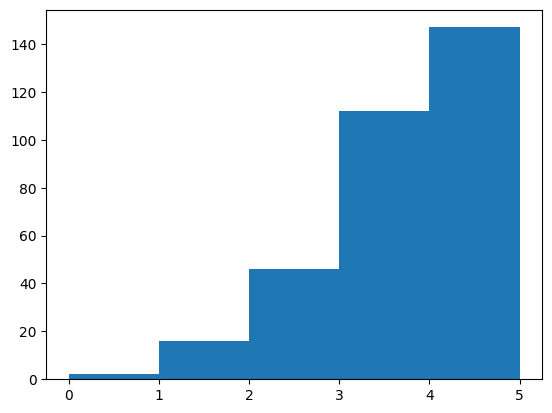

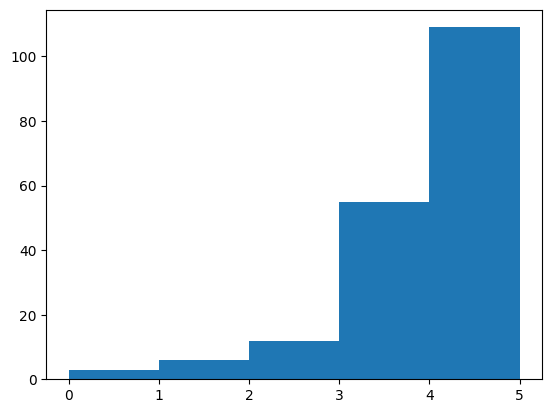

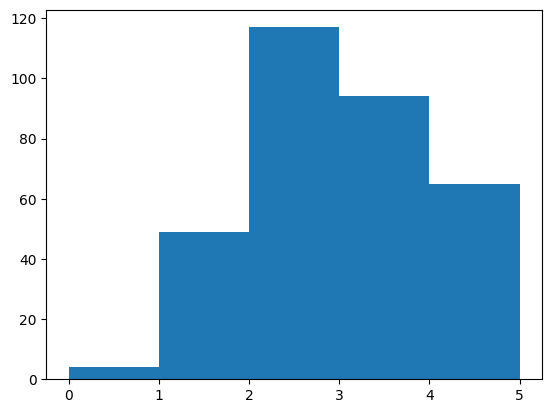

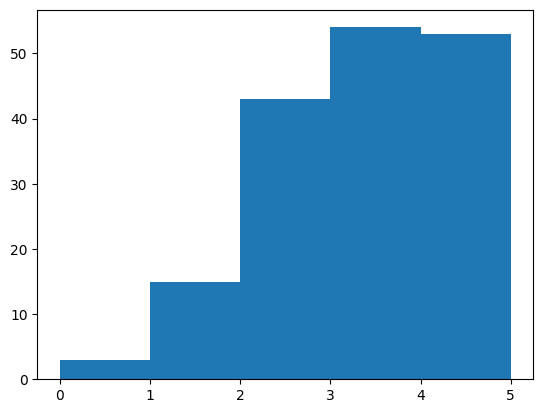

In [28]:
# plotto le figure per vedere se la distribuzione dei dati è normale
#La distribuzione normale ha la forma di una campana, dove il valore centrale corrisponde a media e mediana.
#NB: a seguire metto 6 perchè il numero massimo di casse che il soggetto può aprire per area è 5

plt.figure()
plt.hist(box_opened_1,np.arange(6))

plt.figure()
plt.hist(box_opened_2,np.arange(6))

plt.figure()
plt.hist(box_opened_3,np.arange(6))

plt.figure()
plt.hist(box_opened_4,np.arange(6))

In [29]:
# a seguire faccio il t-test

# import scipy.stats as stats

# # t-test delle condizioni in cui la batteria è lunga
# t_stat, p_value = stats.ttest_ind(box_opened_1, box_opened_2)
# print("t-test a campioni indipendenti sulle condizioni con la batteria lunga:", t_stat, p_value)

# alpha = 0.05
# if p_value < alpha:
#     print("Differenza significativa")
# else:
#     print("Nessuna differenza significativa")



# # t-test delle condizioni in cui la batteria è corta
# t_stat, p_value = stats.ttest_ind(box_opened_3, box_opened_4)
# print("t-test a campioni indipendenti sulle condizioni con la batteria corta:", t_stat, p_value)

# alpha = 0.05
# if p_value < alpha:
#     print("Differenza significativa")
# else:
#     print("Nessuna differenza significativa")


In [30]:
# avendo visto qualche riga sopra che il numero delle casse aperte non è uguale tra le 4 condizioni faccio un altro tipo di test
# questo test è un test non parametrico: "test di Wilcoxon-Mann-Whitney" - si utilizza come l'analogo non parametrico del t-test per campioni indipendenti

import scipy.stats as stats


statistic, p_value = stats.mannwhitneyu(box_opened_1, box_opened_2)
print("t-test sulle condizioni con la batteria lunga:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



statistic, p_value = stats.mannwhitneyu(box_opened_3, box_opened_4)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")


t-test sulle condizioni con la batteria lunga: 25334.0 0.0029999519634805365
Differenza significativa
t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta: 22686.5 0.0007167699131698044
Differenza significativa


In [31]:

import scipy.stats as stats

# Perform Mann-Whitney U test and store results
results = []
statistic, p_value = stats.mannwhitneyu(box_opened_1, box_opened_2)
results.append(["Long battery conditions", statistic, p_value,"Significant difference" if p_value < 0.05 else "Non significant difference"])

statistic, p_value = stats.mannwhitneyu(box_opened_3, box_opened_4)
results.append(["Short battery conditions", statistic, p_value,"Significant difference" if p_value < 0.05 else "Non significant difference"])

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('BoxOpenedFirstArea_mannwhitneyresults.csv', index=False)

print("Results saved to 'BoxOpenedFirstArea_mannwhitneyresults.csv'.")
print(results)

Results saved to 'BoxOpenedFirstArea_mannwhitneyresults.csv'.
[['Long battery conditions', 25334.0, 0.0029999519634805365, 'Significant difference'], ['Short battery conditions', 22686.5, 0.0007167699131698044, 'Significant difference']]


In [32]:
import scipy.stats as stats
import numpy as np

# Concatenate box_opened_1 and box_opened_2
combined_1 = np.concatenate((box_opened_1, box_opened_2))
# Calculate mean and standard deviation for combined data
mean_combined_1 = np.mean(combined_1)
std_dev_combined_1 = np.std(combined_1)

print("Mean for box_opened_1 and box_opened_2 combined:", mean_combined_1)
print("Standard Deviation for box_opened_1 and box_opened_2 combined:", std_dev_combined_1)

# Perform Mann-Whitney U test for box_opened_1 and box_opened_2
statistic, p_value = stats.mannwhitneyu(box_opened_1, box_opened_2)
print("Mann-Whitney U test for conditions with long battery:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Significant difference")
else:
    print("No significant difference")


# Concatenate box_opened_3 and box_opened_4
combined_2 = np.concatenate((box_opened_3, box_opened_4))
# Calculate mean and standard deviation for combined data
mean_combined_2 = np.mean(combined_2)
std_dev_combined_2 = np.std(combined_2)

print("Mean for box_opened_3 and box_opened_4 combined:", mean_combined_2)
print("Standard Deviation for box_opened_3 and box_opened_4 combined:", std_dev_combined_2)

# Perform Mann-Whitney U test for box_opened_3 and box_opened_4
statistic, p_value = stats.mannwhitneyu(box_opened_3, box_opened_4)
print("Mann-Whitney U test for conditions with short battery:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Significant difference")
else:
    print("No significant difference")


Mean for box_opened_1 and box_opened_2 combined: 3.4606299212598426
Standard Deviation for box_opened_1 and box_opened_2 combined: 1.1084967106536288
Mann-Whitney U test for conditions with long battery: 25334.0 0.0029999519634805365
Significant difference
Mean for box_opened_3 and box_opened_4 combined: 2.6841046277665996
Standard Deviation for box_opened_3 and box_opened_4 combined: 1.1430873744348091
Mann-Whitney U test for conditions with short battery: 22686.5 0.0007167699131698044
Significant difference


In [33]:
box_opened_1

array([1, 3, 4, 2, 3, 3, 3, 3, 4, 5, 4, 4, 3, 3, 4, 3, 3, 5, 3, 0, 4, 1,
       3, 4, 3, 3, 3, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 4, 1, 1,
       1, 4, 0, 1, 2, 2, 4, 3, 4, 4, 3, 5, 5, 4, 4, 5, 3, 5, 4, 4, 3, 4,
       4, 4, 4, 3, 5, 3, 4, 3, 5, 5, 3, 3, 3, 5, 5, 4, 5, 5, 5, 5, 5, 3,
       3, 5, 2, 4, 3, 3, 1, 3, 2, 5, 2, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 4,
       3, 2, 3, 3, 4, 2, 4, 3, 2, 2, 5, 3, 5, 3, 4, 3, 5, 4, 5, 4, 4, 3,
       3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 2,
       3, 4, 4, 1, 4, 2, 3, 4, 5, 1, 3, 4, 3, 2, 4, 2, 4, 4, 4, 1, 2, 4,
       5, 3, 3, 3, 4, 4, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 5, 5, 5,
       5, 5, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 1,
       1, 1, 3, 1, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 2, 3, 3, 2, 3, 4, 4, 3,
       4, 4, 2, 4, 3, 3, 3, 4, 5, 3, 4, 4, 3, 2, 2, 2, 2, 3, 3, 3, 4, 3,
       4, 4, 3, 3, 5, 2, 1, 3, 2, 2, 5, 5, 5, 2, 3, 3, 4, 3, 3, 4, 3, 5,
       4, 5, 4, 5, 5, 4, 4, 5, 3, 4, 4, 4, 4, 4, 4,

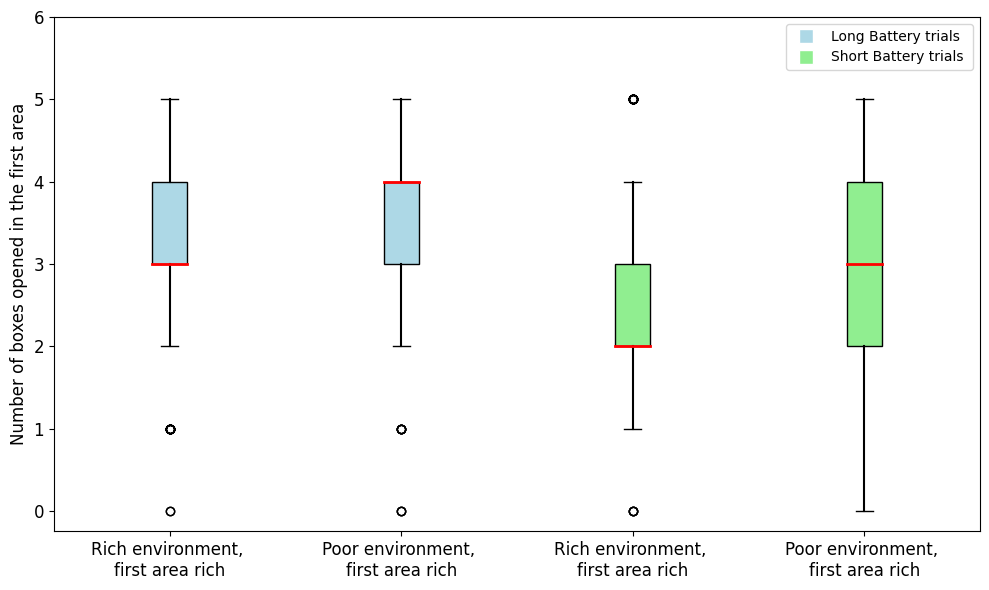

In [34]:
import matplotlib.pyplot as plt

data_long_battery = [box_opened_1, box_opened_2]
data_short_battery = [box_opened_3, box_opened_4]

# Combine data for Long Battery and Short Battery
data = data_long_battery + data_short_battery

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot for Long Battery in blue
box_long_battery = ax.boxplot(data_long_battery, positions=[1, 2],
                              labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                              ], patch_artist=True)

# Customize the box plot for Long Battery
colors_long_battery = ['lightblue', 'lightblue']
for patch, color in zip(box_long_battery['boxes'], colors_long_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_long_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_long_battery['medians']:
    median.set(color='red', linewidth=2)

# Box plot for Short Battery in green
box_short_battery = ax.boxplot(data_short_battery, positions=[3, 4],
                               labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                               ], patch_artist=True)

# Customize the box plot for Short Battery
colors_short_battery = ['lightgreen', 'lightgreen']
for patch, color in zip(box_short_battery['boxes'], colors_short_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_short_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_short_battery['medians']:
    median.set(color='red', linewidth=2)

# Set title and labels
ax.set_ylabel('Number of boxes opened in the first area', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# Add legend
legend_labels = ['Long Battery trials ', 'Short Battery trials ']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in
                  ['lightblue', 'lightgreen']]

ax.legend(legend_handles, legend_labels, loc='upper right')

ax.set_ylim([-0.25, 6]) #questo mi permette di alzare l'asse delle y così che la legend non vada sul boxplot

# Tight layout
plt.tight_layout()


plt.show()